# 3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv file
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [94]:
# removing the outlier

In [19]:
df["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [20]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]


In [21]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns=['trip_duration'], inplace=True)

In [22]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

# K - NEAREST NEIGHBOURS MODEL

In [23]:
custom_df = df.sample(100000)

In [24]:
sample_df = custom_df 

In [25]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = sample_df["trip_duration_hour"]

In [26]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [27]:
#converting the store and fwd flag to int type
sample_df["passenger_count"].value_counts()

1    70711
2    14534
5     5415
3     4039
6     3417
4     1884
Name: passenger_count, dtype: int64

In [28]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
169719,-73.953377,40.785610,-73.960793,40.777550,0,0,1,0,0,0
272637,-73.989151,40.769291,-73.966148,40.770828,1,0,0,0,0,0
66172,-73.975731,40.744968,-73.995148,40.737518,0,0,0,0,1,0
470213,-73.975845,40.683399,-73.870796,40.728256,1,0,0,0,0,0
319715,-73.973320,40.754269,-74.004005,40.725674,1,0,0,0,0,0


In [29]:
#seperate features and target
x = df1
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [30]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [31]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.075624,0.738037,0.271325,0.792571,0.0,0.0,1.0,0.0,0.0,0.0
1,0.071519,0.728966,0.270841,0.789662,1.0,0.0,0.0,0.0,0.0,0.0
2,0.073059,0.715446,0.268221,0.775247,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073046,0.681221,0.279458,0.771239,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073335,0.720615,0.267420,0.770122,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [33]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [34]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.8918734839490347


# Finding the value of k using elbow method

In [35]:
#Now lets construct an elbow classifier for picking least error parameter i.e. least value of n_neighbour
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [36]:
k = range(1,50)

In [37]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

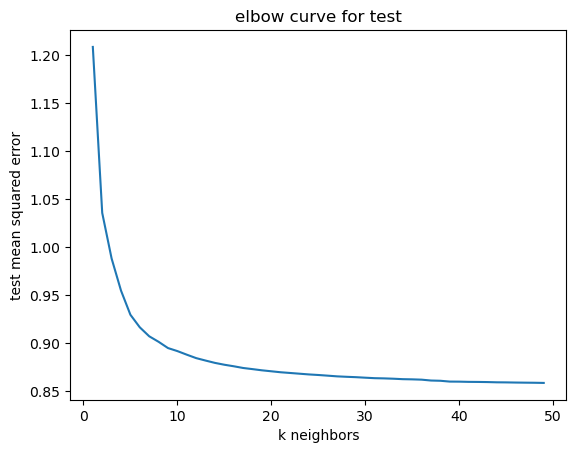

In [38]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [39]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9296939948875651


The best value of k is 10

In [40]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

22.451293627095016

In [41]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-16.42500405010501

In [28]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store knn_test_score

Stored 'knn_test_score' (float64)


In [29]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store knn_train_score

Stored 'knn_train_score' (float64)


# Conclusions
1. The Test RMSE is 0.8585182572256731 when we took the value of k as 10

2. We used Elbow method in order to determine the value of k 

3. On using Elbow method we found that at k = 10 the test RMSE is lesser than the RMSE at K =5 i.e test rmse  0.8719167193459133 when K = 5

4. The train score is 22.10648609822118
5. The test score is -16.42500405010501 which is not pereferd



In [42]:
custom_df=sample_df

In [43]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [44]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime"],axis = 1)
target = sample_df["trip_duration_hour"]

In [45]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
169719,-73.953377,40.785610,-73.960793,40.777550,0,0,1,0,0,0
272637,-73.989151,40.769291,-73.966148,40.770828,1,0,0,0,0,0
66172,-73.975731,40.744968,-73.995148,40.737518,0,0,0,0,1,0
470213,-73.975845,40.683399,-73.870796,40.728256,1,0,0,0,0,0
319715,-73.973320,40.754269,-74.004005,40.725674,1,0,0,0,0,0


In [46]:
df1.shape

(100000, 10)

In [47]:
#seperate features and target
x = df1
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [48]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

# 4. Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.

# Linear Regression model

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [49]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [50]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [51]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.8800947504220866


In [52]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  0.8585182572256731


In [53]:
#computing the coefficients of above model
lr.coef_

array([ 9.33095495e-01, -8.39614623e-01, -1.48502635e-02, -7.76752665e-01,
       -6.72125244e+12, -6.72125244e+12, -6.72125244e+12, -6.72125244e+12,
       -6.72125244e+12, -6.72125244e+12])

# Plotting the coefficients

Text(0.5, 1.0, 'coefficient plot')

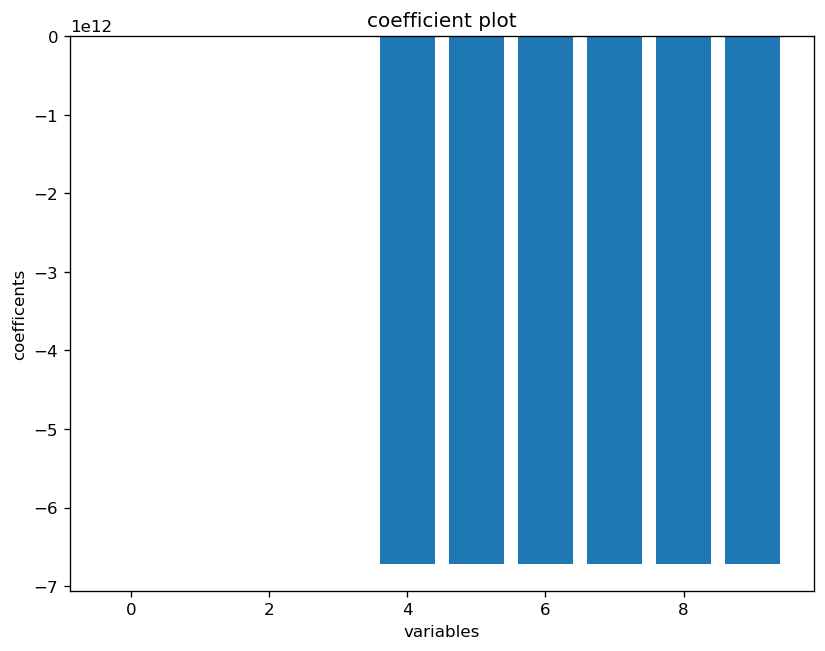

In [54]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled.

In [55]:
#calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
289989,0.268611,0.213867,0.054744
603671,0.343333,0.261719,0.081615
699746,0.606389,0.516602,0.089787
701247,0.181944,0.268555,-0.086610
610335,0.461944,0.351562,0.110382


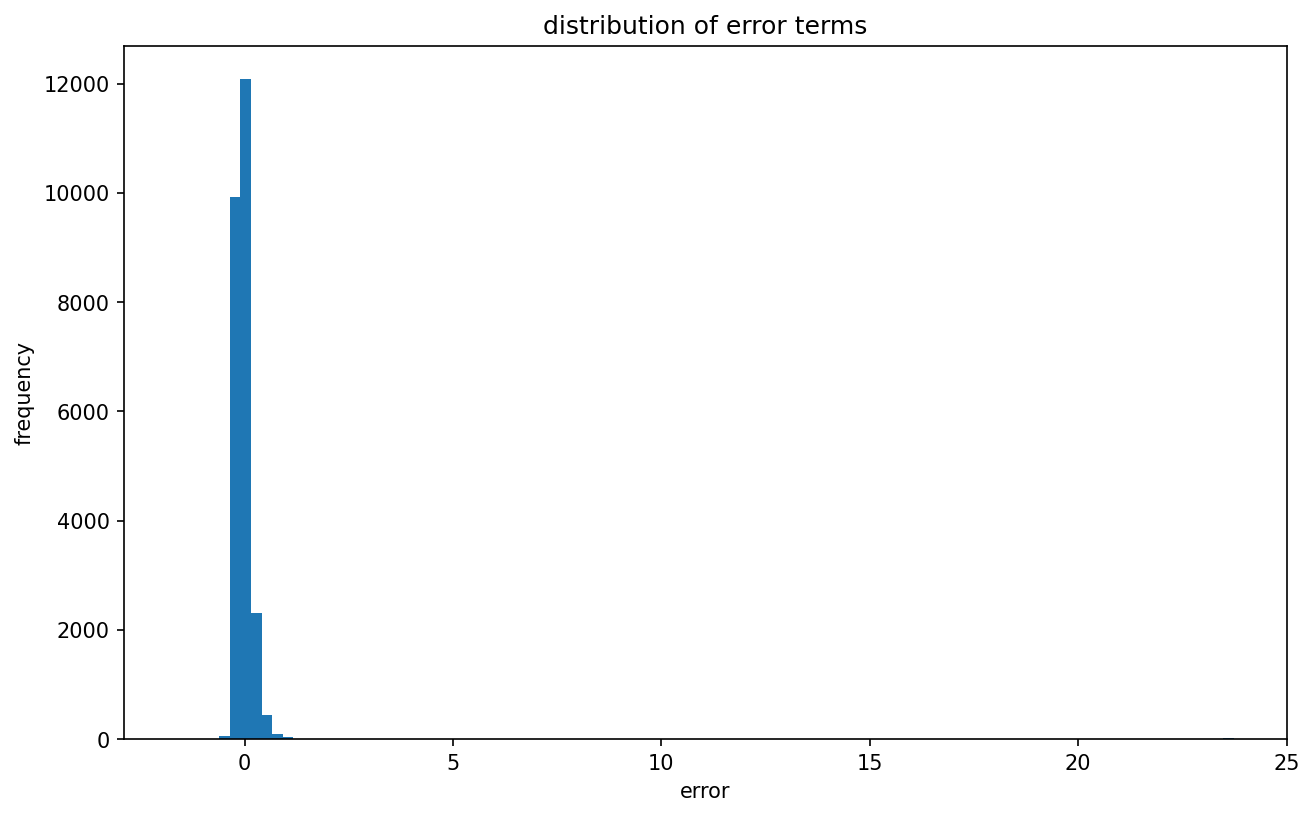

In [56]:
plt.figure(figsize=(10,6),dpi=150,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

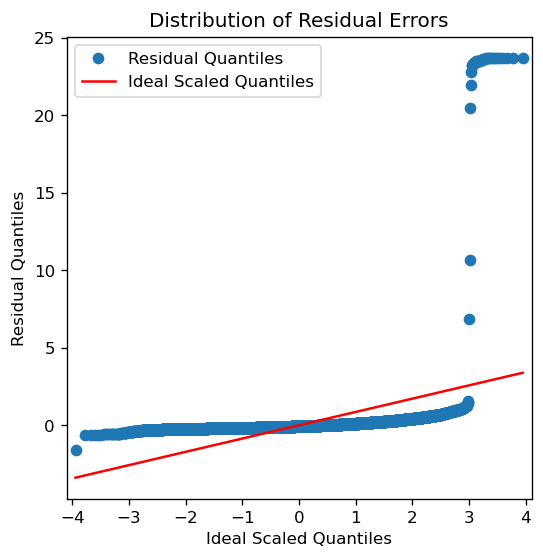

In [57]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [58]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

0.5868613774166032

In [59]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.719197085905432

In [60]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store linear_test_score

Stored 'linear_test_score' (float64)


In [61]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store linear_train_score

Stored 'linear_train_score' (float64)


# Conclusions

1. The training and test RMSE has a huge difference as the training rmse is 0.8800947504220866 and testing rmse is 0.8585182572256731
2. On computing the coefficients we observed that there are some negative values as well
3. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles
4. The train score of linear model is very low  0.5868613774166032
5. The test score of linear model is  very low 0.719197085905432

In [62]:
sample_df=custom_df

In [63]:
sample_df.dtypes.shape

(11,)

In [64]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_hour,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
169719,-73.953377,40.785610,-73.960793,40.777550,0.082222,0,0,1,0,0,0
272637,-73.989151,40.769291,-73.966148,40.770828,0.285556,1,0,0,0,0,0
66172,-73.975731,40.744968,-73.995148,40.737518,0.086111,0,0,0,0,1,0
470213,-73.975845,40.683399,-73.870796,40.728256,0.328611,1,0,0,0,0,0
319715,-73.973320,40.754269,-74.004005,40.725674,0.317778,1,0,0,0,0,0


In [65]:
x = df1.drop(["trip_duration_hour"],axis = 1)
y = df1["trip_duration_hour"]

In [66]:
y.shape

(100000,)

In [67]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

# 5.  Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.

# Decision Tree model

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [68]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [69]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.0005264938085606277


In [70]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  0.0008828025134636724


# To interpret the variable importance.

In [71]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6'],
      dtype='object')

In [72]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


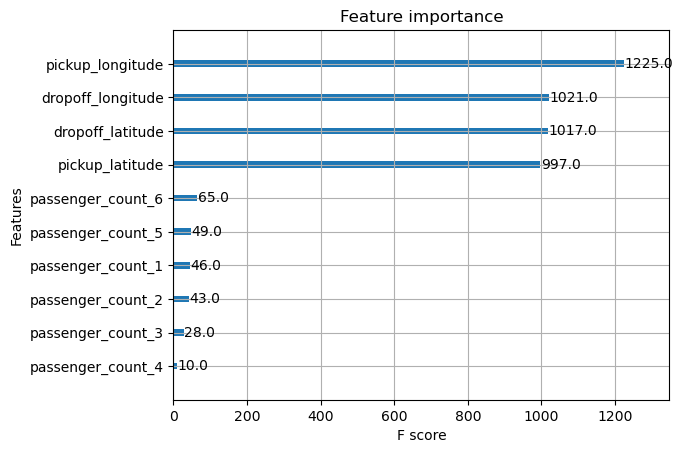

In [73]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

From the above graph we can draw an insight that the varaible "dropoff_latitude" has more impact on the trip duration variable followed by "pickup_longitude" then "pickup_latitude"

In [74]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

99.99996442282492

In [75]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

99.99989502319949

In [76]:
#storing the test score to use it in other file
%store decision_test_score

Stored 'decision_test_score' (float64)


In [77]:
#storing the train score to use it in other file
%store decision_train_score

Stored 'decision_train_score' (float64)


# Conclusions

1.The training RMSE of decision model is 0.0005264938085606277. Where as the testing RMSE is 0.0008828025134636724. They are almost equal so its the best fit

2.The train score and test score is 99.99 so we can consider that decision tree is the best model for predicting the trip duration variable.


# 6. Plot the following Bar plots:


## 0.train score of all the above models.

In [87]:
decision_train_score,linear_train_score,knn_train_score

(0.9999996442282492, 0.005868613774166032, 0.22451293627095015)

In [89]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[0.9999996442282492, 0.005868613774166032, 0.22451293627095015]

## 1. test (not validation!) score of all the above models.


In [90]:
knn_test_score, linear_test_score,decision_test_score

(-0.16425004050105008, 0.00719197085905432, 0.9999989502319949)

## 2. Attempt to explain the observations from the plots (optional)

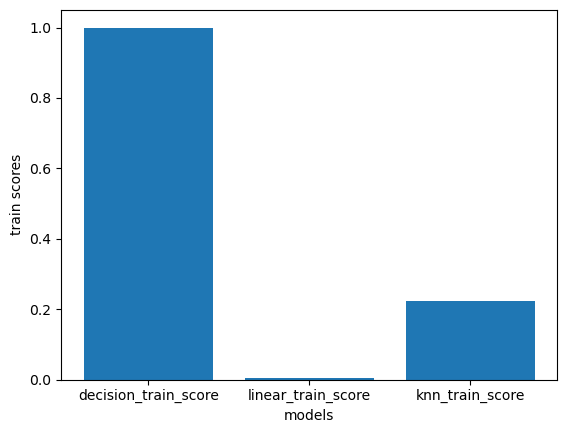

In [92]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [91]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","decision_test_score"]
y1=[-0.16425004050105008,0.00719197085905432,0.9999989502319949]

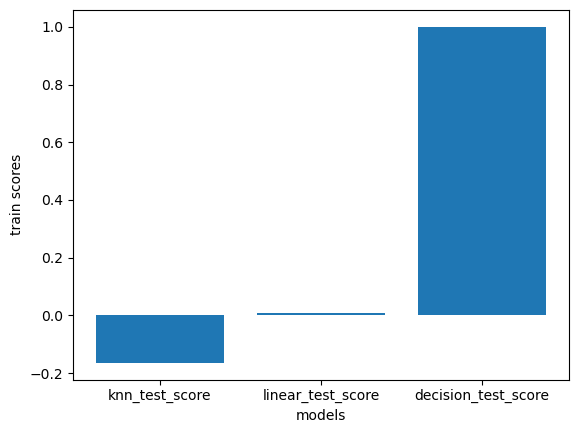

In [93]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

## from above graph we can see that the best model among K-Nearest neighbours, Linear Regression model and Decision Tree the best one is Decision Tree in train score.

In this project we covered various aspects of the Machine learning development cycle. We observed that the data exploration and variable analysis is a very important aspect of the whole cycle and should be done for thorough understanding of the data. We also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further we did feature engineering to filter and gather only the optimal features which are more significant and covered most of the variance in the dataset. Then finally we trained the models on the optimum featureset to get the results